In [678]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
from sklearn import datasets
import matplotlib.pyplot as plt
import seaborn as sns 


from sklearn import preprocessing


#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel





#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
#from sklearn.metrics import plot_confusion_matrix




#cross validation
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression






In [614]:
creditDef1 = pd.read_csv('C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task2\\defaulter_clients.csv',header = 1)
creditDef1.head()
creditDef1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [657]:
#Processed dataset from EDA
creditDefProcOrig = pd.read_csv('C:\\Users\\Owner\\Documents\\DataAnalyticsCourse\\C5_Task2\\defaulter_clients_processed.csv')
creditDefProcOrig.head()
creditDefProcOrig.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null int64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null int64
BILL_AMT2                     30000 non-null int64
BILL_AMT3                     30000 non-null int64
BILL_AMT4                     30000 non-null int64
BILL_AMT5                     30000 non-null int64
BILL_AMT6               

In [726]:
#Preprocessing
#

#creditDefProc['default payment next month'] = creditDefProc['default payment next month'].astype('category')

#make all non-colllege education zero
creditDefProc = creditDefProcOrig.replace({'EDUCATION':[4,5,6]},0)
#print(creditDefProc.iloc[502:504])

#print(creditDefProc.head())
# select features


#features[['AGE','LIMIT_BAL']]

est = preprocessing.KBinsDiscretizer(n_bins=5,encode ='ordinal',strategy='uniform')
ct1 = ColumnTransformer(transformers=[('id','drop',['ID']),
                                      ('binsBal',preprocessing.KBinsDiscretizer(n_bins=5,encode ='ordinal',strategy='uniform'),['LIMIT_BAL']),
                                      ('asis','passthrough',['SEX','EDUCATION','MARRIAGE']),
                                      ('binsAge',preprocessing.KBinsDiscretizer(n_bins=5,encode ='ordinal',strategy='uniform'),['AGE']),
                                      ('BinPay_x',preprocessing.Binarizer(threshold = -1),['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'])],
                        remainder='passthrough')

ct2 = ColumnTransformer(transformers=[('id','drop',['ID']),
                                      ('scaleBAL',preprocessing.MinMaxScaler(),['LIMIT_BAL']),
                                      ('asis','passthrough',['SEX','EDUCATION','MARRIAGE']),
                                      ('scaleAge',preprocessing.MinMaxScaler(),['AGE']),
                                      ('BinPay_x',preprocessing.Binarizer(threshold = -1),['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']),
                                      ('SacleBAL_pay_AMT',preprocessing.MinMaxScaler(),['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])],
                        remainder='passthrough')

ct3 = ColumnTransformer(transformers=[('id','drop',['ID']),
                                      ('scaleBAL',preprocessing.StandardScaler(),['LIMIT_BAL']),
                                      ('asis','passthrough',['SEX','EDUCATION','MARRIAGE']),
                                      ('scaleAge',preprocessing.StandardScaler(),['AGE']),
                                      ('BinPay_x',preprocessing.Binarizer(threshold = -1),['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']),
                                      ('SacleBAL_pay_AMT',preprocessing.StandardScaler(),['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6'])],
                        remainder='passthrough')
#features2bin = 
#features_bin1 = est.fit(features[['LIMIT_BAL','AGE']])
print('summary of feature AGE binned')
#print(ct1)
#print(est.fit_transform(features[['LIMIT_BAL','AGE']]))
#binnedDF=pd.DataFrame(est.fit(features[['LIMIT_BAL','AGE']]),columns=['LIMIT_BAL','AGE'])
#binnedDF.head()
#binFit = ct1.fit(creditDefProc)

#binDFCT=pd.DataFrame(ct1.fit_transform(creditDefProc),index=creditDefProc.index,columns=creditDefProc.columns[1:25])
binDFCT=pd.DataFrame(ct2.fit_transform(creditDefProc),index=creditDefProc.index,columns=creditDefProc.columns[1:25])
binDFCT.head()#
binDFCT.info()#

#creditDefProc.head()

#print(est.bin_edges_[0])
#print(est.bin_edges_[1])

binDFCTint = binDFCT[['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].astype('int64')

binDFCTflt = binDFCT[['LIMIT_BAL','AGE','BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6','PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']].astype('float64')
#binDFCTint.info()
#covMatInfo = binDFCTint.cov()
covMatInfo = binDFCTflt.cov()

print(covMatInfo)

#binDFCT['LIMIT_BAL']= binDFCT['LIMIT_BAL']. astype('category')
#binDFCT['AGE']= binDFCT['AGE']. astype('category')
binDFCT[['SEX','EDUCATION','MARRIAGE']]= binDFCT[['SEX','EDUCATION','MARRIAGE']]. astype('category')
#binDFCT[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']] = binDFCT[['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']]. astype('category')


binDFCT['default payment next month']= binDFCT['default payment next month']. astype('category')
#rmCols = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
#binDFCT = binDFCT.drop(rmCols,axis=1)
binDFCT.info()




summary of feature AGE binned
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null float64
EDUCATION                     30000 non-null float64
MARRIAGE                      30000 non-null float64
AGE                           30000 non-null float64
PAY_0                         30000 non-null float64
PAY_2                         30000 non-null float64
PAY_3                         30000 non-null float64
PAY_4                         30000 non-null float64
PAY_5                         30000 non-null float64
PAY_6                         30000 non-null float64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6    

#print(ct1.named_transformers_['binsBal'].bin_edges_[0])
#print(ct1.named_transformers_['binsAge'].bin_edges_[0])

#ct1 binning was used for balance limits and Agebased on EDA information.
#Models did not give good recall values on  class 1, which is needed to  be agressive on identifying a defaulter

#ct2 preprocessing used scaling and provided good results for KNN and Perceptron





In [708]:
#setdv and create training set
depVar = binDFCT['default payment next month']


features = binDFCT.iloc[:,0:23]
print('summary of features')
features.head()
#Set (Feature Space: X Training)
X_train = (features[:15000])
X_train.head()

summary of features


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,2.0,2.0,1.0,0.051724,1.0,1.0,0.0,0.0,0.0,...,0.000414,0.000000,0.000000,0.000000,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.111111,2.0,2.0,2.0,0.086207,0.0,1.0,1.0,1.0,1.0,...,0.001612,0.003670,0.003726,0.003391,0.000000,0.000594,0.001116,0.001610,0.000000,0.003783
2,0.080808,2.0,2.0,2.0,0.224138,1.0,1.0,1.0,1.0,1.0,...,0.008148,0.016074,0.016122,0.016169,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
3,0.040404,2.0,2.0,1.0,0.275862,1.0,1.0,1.0,1.0,1.0,...,0.029620,0.031757,0.031234,0.030725,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
4,0.040404,1.0,2.0,1.0,0.620690,0.0,1.0,0.0,1.0,1.0,...,0.021534,0.023486,0.020650,0.019894,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284


In [709]:
#Set dv training manually

Y_train = depVar[:15000]
Y_train_count = len(Y_train.index)
print('# observations in Y:',str(Y_train_count))
Y_train.head()

# observations in Y: 15000


0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: default payment next month, dtype: category
Categories (2, float64): [0.0, 1.0]

In [710]:
#set X testing manually 
X_test = features[-3000:]
X_test_count = len(X_test.index)
print(' # of observations infeature test set:',str(X_test_count))
print(X_test.head())

 # of observations infeature test set: 3000
       LIMIT_BAL  SEX EDUCATION MARRIAGE       AGE  PAY_0  PAY_2  PAY_3  \
27000   0.101010  1.0       1.0      2.0  0.155172    1.0    1.0    1.0   
27001   0.040404  1.0       2.0      1.0  0.344828    1.0    1.0    1.0   
27002   0.010101  1.0       2.0      1.0  0.327586    1.0    1.0    1.0   
27003   0.006061  1.0       0.0      1.0  0.431034    1.0    1.0    1.0   
27004   0.050505  1.0       1.0      2.0  0.172414    1.0    1.0    1.0   

       PAY_4  PAY_5  ...  BILL_AMT3  BILL_AMT4  BILL_AMT5  BILL_AMT6  \
27000    1.0    1.0  ...   0.037919   0.078950   0.074054   0.080601   
27001    1.0    1.0  ...   0.004490   0.009021   0.021060   0.007866   
27002    1.0    1.0  ...   0.003378   0.021605   0.019881   0.027174   
27003    1.0    1.0  ...   0.016204   0.033111   0.034548   0.032636   
27004    1.0    0.0  ...   0.030888   0.000000   0.000000   0.000000   

       PAY_AMT1  PAY_AMT2  PAY_AMT3  PAY_AMT4  PAY_AMT5  PAY_AMT6  
2700

In [711]:
#set Y testing set: Ground truth
Y_test = depVar[-3000:]
Y_test_count = len(Y_test.index)
print(' # of observations in Y  test set:',str(Y_test_count))
print(Y_test.head())

 # of observations in Y  test set: 3000
27000    0.0
27001    0.0
27002    0.0
27003    0.0
27004    0.0
Name: default payment next month, dtype: category
Categories (2, float64): [0.0, 1.0]


In [712]:
#Better to randmize the split instead of manual split

XtrainCV,XtestCV,YtrainCV,YtestCV = train_test_split(X_train,Y_train,test_size=0.25)

XtrainCV.shape,XtestCV.shape

#XtextCV , randomized test set will also be used to measure the supervised learning metric

((11250, 23), (3750, 23))

In [713]:
#Models: KNN
modelKNN = KNeighborsClassifier(n_neighbors =3,n_jobs = -1)
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression(n_jobs=-1)


#Check for NAs and preprocessing 
#No NAs in EDA processed dataset.

#train
modelKNN.fit(X_train,Y_train)
print('CV score metric')
print(cross_val_score(modelKNN, X_train, Y_train,cv=5))


CV score metric
[0.71442852 0.71076308 0.71533333 0.70523508 0.7129043 ]


#Neighbors=3 performed the best. Neigbours=5, 10 did not yield good results
#Goal is to get high recall for class 1.

Metric from training set
              precision    recall  f1-score   support

         0.0       0.87      0.95      0.91      2913
         1.0       0.73      0.50      0.59       837

    accuracy                           0.85      3750
   macro avg       0.80      0.72      0.75      3750
weighted avg       0.84      0.85      0.84      3750

Metric from holdout test set
              precision    recall  f1-score   support

         0.0       0.80      0.87      0.84      2337
         1.0       0.35      0.24      0.29       663

    accuracy                           0.73      3000
   macro avg       0.58      0.56      0.56      3000
weighted avg       0.70      0.73      0.71      3000

Kappa metric
0.1279284445197416
confusion matrix
[[1052 1285]
 [ 196  467]]


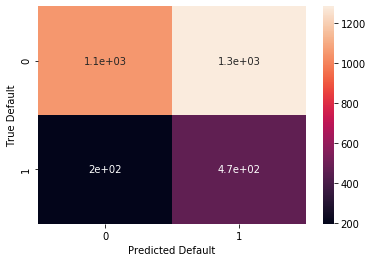

In [715]:
#Metric from training
predictionsKNNtrain = modelKNN.predict(XtestCV)
print('Metric from training set')

print(classification_report(YtestCV, predictionsKNNtrain))

#Metric from holdout dataset

print('Metric from holdout test set')
predictionsKNNtest = modelKNN.predict(X_test)

print(classification_report(Y_test, predictionsKNNtest))
print('Kappa metric')
print(cohen_kappa_score(Y_test, predictionsKNNtest))

print('confusion matrix')



cmKNN = confusion_matrix(Y_test, predictionsLintest,labels=[0,1])
print(cmKNN)

ptKNN = sns.heatmap(cmKNN,annot=True)

ptKNN.set_xlabel('Predicted Default');ptKNN.set_ylabel('True Default');



#Low false detection of 1 as zero but overall class 1 recall is still 0.24
#CV scores are consistent
#class zero precision is high

In [716]:
#Models
modelLin = linear_model.Perceptron()
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression(n_jobs=-1)


#Check for NAs and preprocessing 
#No NAs found . check done earlier

#train
modelLin.fit(X_train,Y_train)
print('Perceptron CV score metric')
print(cross_val_score(modelLin, X_train, Y_train,cv=5))


Perceptron CV score metric
[0.76307897 0.2889037  0.775      0.77225742 0.35611871]


              precision    recall  f1-score   support

         0.0       0.84      0.42      0.56      2913
         1.0       0.26      0.72      0.38       837

    accuracy                           0.49      3750
   macro avg       0.55      0.57      0.47      3750
weighted avg       0.71      0.49      0.52      3750

              precision    recall  f1-score   support

         0.0       0.84      0.45      0.59      2337
         1.0       0.27      0.70      0.39       663

    accuracy                           0.51      3000
   macro avg       0.55      0.58      0.49      3000
weighted avg       0.72      0.51      0.54      3000

Kappa metric
0.09729028608766466
confusion matrix
[[1052 1285]
 [ 196  467]]


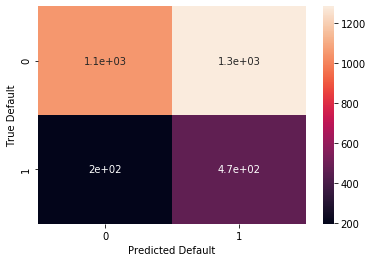

In [717]:
#Prediction and Metric from training


predictionsLintrain = modelLin.predict(XtestCV)

print(classification_report(YtestCV, predictionsLintrain))

#Metric from holdout set

predictionsLintest = modelLin.predict(X_test)

print(classification_report(Y_test, predictionsLintest))

print('Kappa metric')
print(cohen_kappa_score(Y_test, predictionsLintest))

print('confusion matrix')

cmLin = confusion_matrix(Y_test, predictionsLintest,labels=[0,1])
print(cmLin)

ptLin = sns.heatmap(cmLin,annot=True)

ptLin.set_xlabel('Predicted Default');ptLin.set_ylabel('True Default');


#High recall for class 1
#CV scores vary a lot. So, model consistency is a bit low
Confusion matrix very similar to KNN


In [718]:
#train
modelRFC =  RandomForestClassifier(n_jobs=-1)
modelRFC.fit(X_train,Y_train)
print('Random Forest CV score metric')
print(cross_val_score(modelRFC, X_train, Y_train,cv=5))


C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Random Forest CV score metric
[0.76474508 0.77474175 0.775      0.77525842 0.77592531]


              precision    recall  f1-score   support

         0.0       0.97      1.00      0.99      2913
         1.0       1.00      0.90      0.95       837

    accuracy                           0.98      3750
   macro avg       0.98      0.95      0.97      3750
weighted avg       0.98      0.98      0.98      3750

              precision    recall  f1-score   support

         0.0       0.80      0.95      0.87      2337
         1.0       0.49      0.17      0.25       663

    accuracy                           0.78      3000
   macro avg       0.65      0.56      0.56      3000
weighted avg       0.73      0.78      0.73      3000

Kappa metric
0.15526655892521568
confusion matrix
[[2220  117]
 [ 551  112]]


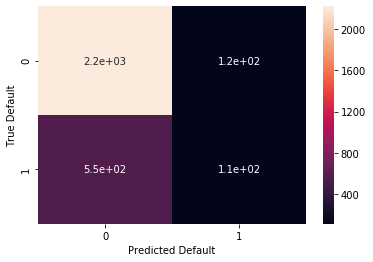

In [719]:
#Metric from training
predictionsRFCtrain = modelRFC.predict(XtestCV)

print(classification_report(YtestCV, predictionsRFCtrain))

#Metric from holdout set
predictionsRFCtest = modelRFC.predict(X_test)

print(classification_report(Y_test, predictionsRFCtest))

print('Kappa metric')
print(cohen_kappa_score(Y_test, predictionsRFCtest))

print('confusion matrix')


cmRFC = confusion_matrix(Y_test, predictionsRFCtest,labels=[0,1])
print(cmRFC)

ptRFC = sns.heatmap(cmRFC,annot=True)

ptRFC.set_xlabel('Predicted Default');ptRFC.set_ylabel('True Default');





#CV scores consistent
#recall for class 1 is low
#Confusion matrix also shows more classification of class 1 as zero (this won't help reducing the defaults)

[ True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True]
          0  1  2  3          4  5  6  7  8           9   ...          11  \
0   0.010101  2  2  1  0.0517241  1  0  0  0  0.00405698  ...  0.00041404   
1   0.111111  2  2  2  0.0862069  0  1  1  1  0.00278068  ...  0.00161169   
2  0.0808081  2  2  2   0.224138  1  1  1  1   0.0303148  ...    0.008148   
3   0.040404  2  2  1   0.275862  1  1  1  1    0.048719  ...   0.0296204   
4   0.040404  1  2  1    0.62069  0  0  1  1  0.00893406  ...   0.0215343   

           12          13         14          15           16          17  \
0           0           0          0           0  0.000409082           0   
1  0.00366986  0.00372639   0.003391           0  0.000593733  0.00111602   
2   0.0160736   0.0161222  0.0161688  0.00173773  0.000890599  0.00111602   
3   0.0317569   0.0312337  0.0307249   0.0022895   0.00119875  0.00133923   
4   0.02348

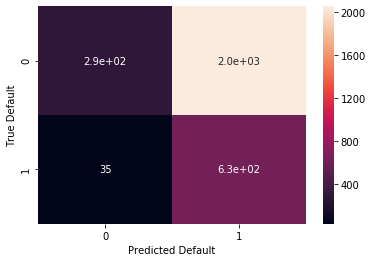

In [724]:
#reduced parameters for  Perceptron

estModel = linear_model.Perceptron()
FtrSelect1 = RFE(estModel,21,step=1)
#FtrSelect2 = SelectFromModel(estModel)

LessFtr_train = pd.DataFrame(FtrSelect1.fit_transform(X_train,Y_train))

LessFtr_testCV = pd.DataFrame(FtrSelect1.fit_transform(XtestCV,YtestCV))
LessFtr_test = pd.DataFrame(FtrSelect1.fit_transform(X_test,Y_test))

print(FtrSelect1.get_support())
print(LessFtr_train.head())

#print(LessFtr_testCV.head())
#print(LessFtr_test.head())



estModel.fit(LessFtr_train,Y_train)

print('CV score metric')
print(cross_val_score(estModel, LessFtr_train, Y_train,cv=5))

print('Metric from training')

predictionsLintest1 = estModel.predict(LessFtr_testCV)

print(classification_report(YtestCV, predictionsLintest1))
                               
print('Metric from holdout set')

predictionsLintest2 = estModel.predict(LessFtr_test)

print(classification_report(Y_test, predictionsLintest2))

print('Kappa metric')
print(cohen_kappa_score(Y_test, predictionsLintest2))

print('confusion matrix')

cmLin2=confusion_matrix(Y_test, predictionsLintest2,labels=[0,1])
print(cmLin2)

pt2 = sns.heatmap(cmLin2,annot=True)

pt2.set_xlabel('Predicted Default');pt2.set_ylabel('True Default');




#Reducing features less than 21 does not yield good results for Perceptron
#Very agressive in terms of classifying a defaulter, recall of zero very low. May reject a lot of genuine applications, could be an overfit

Perceptron CV score metric
[0.76307897 0.2889037  0.775      0.77225742 0.35611871]
              precision    recall  f1-score   support

         0.0       0.84      0.42      0.56      2913
         1.0       0.26      0.72      0.38       837

    accuracy                           0.49      3750
   macro avg       0.55      0.57      0.47      3750
weighted avg       0.71      0.49      0.52      3750

              precision    recall  f1-score   support

         0.0       0.84      0.45      0.59      2337
         1.0       0.27      0.70      0.39       663

    accuracy                           0.51      3000
   macro avg       0.55      0.58      0.49      3000
weighted avg       0.72      0.51      0.54      3000

Kappa metric
0.09729028608766466
confusion matrix
[[1052 1285]
 [ 196  467]]


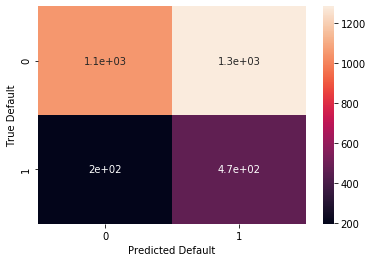

In [723]:
#Model Perceptron parameter tuning
modelLin2 = linear_model.Perceptron(alpha=0.2,eta0 =0.8)
#modelRF = RandomForestRegressor()
#modelLR = LinearRegression(n_jobs=-1)


#Check for NAs and preprocessing 
#No NAs found . check done earlier

#train
modelLin2.fit(X_train,Y_train)
print('Perceptron CV score metric')
print(cross_val_score(modelLin2, X_train, Y_train,cv=5))


#Metric from training


predictionsLintrain2 = modelLin2.predict(XtestCV)

print(classification_report(YtestCV, predictionsLintrain2))

#Metric from holdout set

predictionsLintest2 = modelLin2.predict(X_test)

print(classification_report(Y_test, predictionsLintest2))

print('Kappa metric')
print(cohen_kappa_score(Y_test, predictionsLintest2))

print('confusion matrix')

cmLin2 = confusion_matrix(Y_test, predictionsLintest2,labels=[0,1])
print(cmLin)

ptLin2 = sns.heatmap(cmLin2,annot=True)

ptLin2.set_xlabel('Predicted Default');ptLin2.set_ylabel('True Default');


#Not much difference with Perceptron with parameter tuning.Tried different alpha values 0.2- 0.7